In [1]:
# import packages
import pandas as pd #this for importing/exporting data and creating dataframes
import numpy as np #this is for scientific computation. 
import copy #this allows to copy
import scipy.stats.stats as stats #this is probability distributions and a library of statistical functions
from sklearn.model_selection import train_test_split #this is to split the data into train and test (validation)
from sklearn.linear_model import LogisticRegression #this is logistic regression
from sklearn.metrics import roc_auc_score #to calculate the ROC
import matplotlib.pyplot as plt #this is for the graph
from sklearn.tree import DecisionTreeClassifier #this is for decision tree
from sklearn import tree #this is for decision tree too
pd.options.mode.chained_assignment = None  # default='warn' #this is for hide warm

In [2]:
# import data
db = pd.read_excel(r"\\neptune\RAD\4 Models\Scorecard 7.0\Modeling Data\JM\Valid FICO CA Nohit\Accepts_9541.xlsx") #imports the accepted file
db[['G_B','Frequency']].head()

,G_B,Frequency
0,GOOD,2.144693
1,GOOD,2.144693
2,INDET,2.144693
3,GOOD,2.144693
4,GOOD,2.144693


In [4]:
# filter Good and Bad
Goods=db[db["G_B"]=="GOOD"]  #we use two db because one db will give the count of the whole dataset
Bads=db[db["G_B"]=="BAD"]
print("Good:",len(Goods), "Bad:",len(Bads))

Good: 5563 Bad: 3034


In [5]:
#sample down
if len(Goods) >= len(Bads):
    Bad = Bads
    Good = Goods.sample(len(Bad),random_state =2602)
    print("Good:",len(Good),"Bad:",len(Bad))
else:
    Good = Goods
    Bad = Bads.sample(len(Good),random_state=2602)
    print("Good:",len(Good),"Bad:",len(Bad))

Good: 3034 Bad: 3034


In [6]:
# append Good and Bad
GB=Good.append(Bad) #can do Good.append(Bad)
print("append Good and Bad:",len(GB)) #GB #will give the dataset that has the good and bad appended

append Good and Bad: 6068


In [7]:
#not included in code
data_type = GB.dtypes #gives the datatype for each variable
#data_type #prints the list of the variable with the datatype

In [8]:
# all categorical variable and unnecessary columns
a = GB.dtypes[GB.dtypes=='object'].index.tolist()
b = GB.dtypes[GB.dtypes=='datetime64[ns]'].index.tolist()
a.extend(b)
a.extend(['LNKEY','LNKey','lnkey','Contract_Open_Date','BY1_SCORE','SCOREX','BY1_SEG','BY1_GRADE','BY2_SCORE', 'CASH_DOWNPCT',\
          'NET_AFPCT','YRSATWORK','BYRAGE','ANNUAL_RATE','NAMTF_LFC','BRANCH','LOT_ID','CHECK_DATE','STA','DEL_STA',\
          'X_BOOK','P','RECOURSE','DISC_PC','INVOICE_BOOK_VALUE','NADA_VALUE','VHCL_YEAR','MAKE','MODEL','ODO','INCOME_TYPE',\
          'GROSS_MONTH','EMPLOYER_NAME','JOB_POSITION','LGL_ST','DOWN','PAYMENT','Buyer_1_MOSATWORK','Buyer_2_MOSATWORK',\
          'CTRL_ZIP','Advance','BYR1_FICO','AMTF_LFC','DECRULESET','CAR_AGE','OPENINGBALANCE_PCT','AMTF_LFC_PCT_Risk',\
          'AUTOMOBILE_PRICE','ACV_VALUE','Valid_SSN_Indicator','CLOSE_DATE','CLOSE_CODE','GAIN','DR_ORIGBAL',\
          'DAYS_LATE','PAIDMO','TERM','FIRST_PMT_PAYMENT','Decision_Status','PMTs_Default','PTI','LTVPCT_XBOOK','APR_ANNUAL_RATE',\
          'AMOUNT_FINANCED','BAD_CLOSECODE_Indicator','OPEN_YEARMONTH','CLOSE_YEARMONTH','SC60_Segment','SC60_Stage1',\
          'SC60_Stage2','SQL_CASHDOWNPCT','SQL_OPENINGBALANCE_PCT','SQL_PTI','SQL_LTV','ft_appdt_match','ft_match','Frequency','ssndatelowissued',
          'subjectage','BAD_CLOSECODE_Indicator',])#extends the above "a" list to include other columns that we do not need 
a #a #will print the list "a" that includes all the columns that are categorical and that are not needed for the model

['LNKEY',
 'BY1_SEG',
 'BY1_GRADE',
 'BRANCH',
 'STA',
 'DEL_STA',
 'P',
 'MAKE',
 'MODEL',
 'INCOME_TYPE',
 'EMPLOYER_NAME',
 'JOB_POSITION',
 'LGL_ST',
 'CLOSE_CODE',
 'Decision_Status',
 'PMTs_Default',
 'Model_State',
 'LNKey',
 'SC60_Segment',
 'lnkey',
 'LL_BAD_ABA',
 'LL_BNKACT_MISMATCH',
 'LL_BANKRUPTCY',
 'LL_DL_MISMATCH',
 'LL_PAY_FREQ_MISMATCH',
 'LL_RESIDENCE_STATE_MISMATCH',
 'LL_SSN_MISMATCH',
 'ACH_BI1_BankAccountID',
 'ACH_BI1_BUC1_Description',
 'ACH_BI1_BUC2_Description',
 'ACH_BI1_BUC3_Description',
 'ACH_BI1_BUC4_Description',
 'ACH_BI1_BUC5_Description',
 'ACH_BI1_BUC6_Description',
 'ACH_BI1_BUC7_Description',
 'Client Data',
 'Client Data.1',
 'G_B',
 'LL_last_dt_APPL_RCVD',
 'LL_OL_last_dt_APPL_RCVD',
 'LL_SF_last_dt_APPL_RCVD',
 'LNKEY',
 'LNKey',
 'lnkey',
 'Contract_Open_Date',
 'BY1_SCORE',
 'SCOREX',
 'BY1_SEG',
 'BY1_GRADE',
 'BY2_SCORE',
 'CASH_DOWNPCT',
 'NET_AFPCT',
 'YRSATWORK',
 'BYRAGE',
 'ANNUAL_RATE',
 'NAMTF_LFC',
 'BRANCH',
 'LOT_ID',
 'CHECK_DAT

In [9]:
# drop unnecessary columns
GB_for_group = GB.drop(a,axis=1) #drops the list from GB which is defined in the append of good and bad. axis =1 is the columns
#GB_for_group #should give the new number of columns after dropping the variables in the list "a"

In [10]:
#create the frequency table by grabbing the frequency column from the table GB. This should be the same number as the append
frequency = GB['Frequency']
#frequency #will give the freq for each row in the GB table

In [53]:
#data partition
y = pd.get_dummies(GB["G_B"]) #converts categorical variable (target) into dummy/indicator variables such as zero and one. The G_B becomes two columns (Good and Bad)
y_Good = y["GOOD"] #target. Good is 1 and bad is 0
X_train, X_test, y_train, y_test = train_test_split(GB_for_group, y_Good, random_state = 1402, test_size=0.3) #2609
#X_train, X_test, y_train, y_test = train_test_split(all columns except target G_B, target column, random_state (random seed), test_size (or can use train_size))
#X_train #(training data)
#y_train #(training data target variable only)
#X_test #(test data)
#y_test #(test data target variable only)

In [54]:
# create quartile_cut function
def quartile_cut(temp_not_missing, frequency, m):
    t_name = temp_not_missing.name #column name
    a = temp_not_missing.copy() #copy the dataframe. Note this "a" is not the same "a" from above
    a = pd.concat([a,frequency],join='inner',axis=1) #combine the column with the frequency column
    a = a.sort_values(by = t_name) #sorts the column name from smallest to largest
    a['cumulative sum'] = a[frequency.name].cumsum() #calculates the cumulative sum of the frequency
    interval = (a['cumulative sum'].max()+0.05)/m #find the max of the cumulative sum and adds 0.5 to it and then divides it by m which is the number of buckets
    b = {'Bucket_#':[],'Bucket_max':[]} #emtpy lists
    for i in range(1,m+1): #the list will only start at 1 and end at m. It will not include m+1
        b['Bucket_#'].append(i) #b will keep getting appended with just the values of i. 
        b['Bucket_max'].append(a.loc[a['cumulative sum'] <= i*interval, t_name].max()) #this will check the max for each interval. Example, interval 1 for FICO can only go up to FICO score 418
    c = pd.DataFrame(b) #creates the data fram with bucket number and the bucket max for each bucket number
    c['Bucket_max'] = c['Bucket_max'].fillna(a[t_name].min()) #if the row is blank for a column then just include it in the minimum bin
    temp_not_missing = pd.concat([temp_not_missing,frequency],join='inner',axis=1) #combines column name with frequency
    temp_not_missing = temp_not_missing.reset_index() #reset the index of the dataframe 
    temp_not_missing = temp_not_missing.sort_values(by = t_name) #sorts it by small to large by column name
    temp_not_missing[t_name] = temp_not_missing[t_name].astype('float64') #they all have the same data type
    c['Bucket_max'] = c['Bucket_max'].astype('float64') #they all have the same data type
    if len(temp_not_missing) == 0: #if temp_not_missing includes nothing print variable name includes Nan only
        print(t_name + ' are all Nan')
    else: 
        d = pd.merge_asof(temp_not_missing, \
        c.sort_values('Bucket_max'), \
        left_on = t_name, right_on = 'Bucket_max',direction = 'forward').set_index('index')
    return d['Bucket_#']

In [55]:
# interactive grouping with decision tree(*means new)
def interactive_grouping2(X_train, y_train, frequency,n=5, reject_level=0.02): #(n is the maximum number of bins)
    X_train['useless_column'] = 1 #add a useless_column that will be used in decision tree*
    columns_name = X_train.columns  #gives the column name for the training data only
    y_name = y_train.name #gives the column name "GOOD". This variable is found in the data partition code
    freq_name = frequency.name #gives the column name "Frequency".
    group_dictionary={} #creates an empty dictionary
    IV_dictionary = {} #creates an empty dictionary
    for i in range(len(columns_name)-1):
        temp_not_missing = X_train.loc[X_train[columns_name[i]].notnull(), [columns_name[i],'useless_column']] #makes the columns no longer null
        not_missing_with_y = pd.concat([temp_not_missing,y_train],join='inner',axis=1) #add a new column (the train target variable) and if good then 1 or 0 if bad
        not_missing_with_y_fre = pd.concat([not_missing_with_y,frequency],join='inner',axis=1) #add a new column (frequency)
        not_missing_with_y_fre["freq*Good"] = not_missing_with_y_fre[freq_name]*not_missing_with_y_fre[y_name] #multiplies  frequency by the value of good (either 1 or 0). for calculating Good event rate 
        temp_missing = X_train.loc[X_train[columns_name[i]].isnull(), columns_name[i]] #split rows with Nan value out
        missing_with_y = pd.concat([temp_missing,y_train],join='inner',axis=1)
        missing_with_y_fre = pd.concat([missing_with_y,frequency],join='inner',axis=1)
        missing_with_y_fre["freq*Good"] = missing_with_y_fre[freq_name]*missing_with_y_fre[y_name]
        r = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        p = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        u = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        m = n # this is to reset m
    # X = temp_missing, monotonic event rate grouping
        if len(not_missing_with_y_fre) > 0: #if not_missing_with_y_fre has record
            while (np.abs(r) < 0.9 or u <= 100) and m >= 1: #stop until (spearman correlation great than 0.9 and smallest bin has records more than 150) or m = 0
                not_missing_with_y_fre["Bucket1"] = quartile_cut(not_missing_with_y_fre[columns_name[i]],frequency, 20) #quartile function from above. This will create a new variable called Bucket which is the bucket interval from quartile cut
                if m > 1:
                    clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes = m, min_weight_fraction_leaf = 0.045) # *set decision tree parameters (max_leaf_nodes: max number of bins,min_weight_fraction_leaf: min sample % for each bins)*
                    clf = clf.fit(not_missing_with_y_fre[["Bucket1",'useless_column']], not_missing_with_y_fre[y_name], not_missing_with_y_fre[freq_name].values) # *fit not_missing_with_y_fre*
                    not_missing_with_y_fre["Bucket"] = clf.apply(not_missing_with_y_fre[["Bucket1",'useless_column']]) # *find bin number for each records*
                    d2 = not_missing_with_y_fre.groupby('Bucket', as_index = True) #group by function. group by bucket from above
                    r, p = stats.spearmanr(d2[columns_name[i]].mean(), d2["freq*Good"].sum()/d2[freq_name].sum()) #find the average for the column name in the training data, sum of the good event rate and divides it by the sum of the frequency then calculate spearman correlation
                    u = d2[y_name].count().min() #returns the count and minimum of the column that gives the output good.
                    m = m - 1
                else: #if not_missing_with_y_fre doesn't have record
                    not_missing_with_y_fre["Bucket"] = 1
                    d2 = not_missing_with_y_fre.groupby('Bucket', as_index = True)
                    m = 0
            d3 = pd.DataFrame(d2[columns_name[i]].min()) #creates a table
            d3 = d3.rename(columns={columns_name[i]:'min_' + columns_name[i]}) #renames the column in above to mini_column name
            d3['max_' + columns_name[i]] = d2[columns_name[i]].max() #creates the "max_variable name"
            d3[y_name] = d2["freq*Good"].sum() #sum of the good event rate
            d3['total'] = d2[freq_name].sum() #create column called total which is the sum of the frequency 
            d3[y_name + '_rate'] = d3[y_name]/d3['total'] #creates a column for the good rate which is the count of good divided by the total for each interval
            d4 = (d3.sort_values(by = 'min_' + columns_name[i])).reset_index(drop = True) #sorts the "min_variable name" column
            d4 = d4.dropna(subset=['min_' + columns_name[i]]) #drop row that have Nan for min_columns
            d4 = d4.append({y_name:missing_with_y_fre["freq*Good"].sum(), 'total':missing_with_y_fre[freq_name].sum() \
                , y_name + '_rate':missing_with_y_fre["freq*Good"].sum()/missing_with_y_fre[freq_name].sum()},ignore_index=True)
            d4 = d4.dropna(subset=[y_name + '_rate'])
        else:
            print(columns_name[i] + ' includes Nan only')
            d4 = pd.DataFrame({y_name:[missing_with_y_fre["freq*Good"].sum()], 'total':[missing_with_y_fre[freq_name].sum()] \
                        , y_name + '_rate':[missing_with_y_fre["freq*Good"].sum()/missing_with_y_fre[freq_name].sum()]})
        
    # WOE, varified in excel
        Total_Event = d4[y_name].sum() #sum of the event rate
        Total_Nonevent = d4['total'].sum() - Total_Event #sum of the nonevent rate
        d4['WOE'] = d4.apply(lambda x: np.log(((x[y_name]+0.5)/Total_Event)/((x['total']-x[y_name]+0.5)/Total_Nonevent)),axis=1) #WOE calculated
        d4 = d4.dropna(subset=['WOE']) #drop row that have Nan for WOE
        group_dictionary[columns_name[i]] = d4
    # Information Value, varified in excel
        IV_dictionary[columns_name[i]] = d4.apply(lambda x: ((x[y_name]/Total_Event)-((x['total']-x[y_name])/Total_Nonevent))*x['WOE'],axis=1).sum() #information value calculated
    IV_table = pd.DataFrame(list(IV_dictionary.items()),columns=['Variable_Name','Information_Value']).sort_values('Information_Value', ascending=False) #creates table with variable name and the information value. It is ordered by large to small information value
    # reject weak variables
    IV_table["Reject_or_Accept"] = IV_table.apply(lambda x: "Accept" if x['Information_Value']>=reject_level else "reject",axis=1) #mark all the reject variables if the information value is less than reject else mark accept
    # remove rejected variables from train
    Accept_List = IV_table.loc[IV_table["Reject_or_Accept"] == "Accept", 'Variable_Name'].values.tolist() #creates a list of accepted variables
    X = X_train[Accept_List] #training data for the accepted variables
    
    # convert real vaule to WOE
    #X1 = X.fillna(X.min()-1).reset_index()
    #columns = X.columns
    #converted_X = X.copy()
    #for i in range(len(columns)):   
        #X1[columns[i]] = X1[columns[i]].astype('float64')
        #X2 = pd.merge_asof(X1.sort_values(columns[i]), \
                        #group_dictionary[columns[i]].fillna(group_dictionary[columns[i]].min()-1).sort_values('min_' + columns[i]), \
                        #left_on = columns[i], right_on = 'min_' + columns[i])[['index','WOE']].set_index('index')
        #converted_X[columns[i]] = X2['WOE']
    return group_dictionary, Accept_List, IV_table

In [56]:
#convert X_test

def convert_X(X_test, Accept_List, group_dictionary):
    X = X_test[Accept_List] #select variables with information value greater than 0.02
    X1 = X.fillna(X.min()-100000).reset_index() # impute Nan with minimum value-100000
    columns = X.columns #object"columns" incluses all column name
    converted_X = X.copy() # copy X to converted_X
    group_dictionary1 = copy.deepcopy(group_dictionary) # copy group_dictionary to group_dictionary1
    for i in range(len(columns)): #convert original value to WOE based on group_dictionary1
                X1[columns[i]] = X1[columns[i]].astype('float64')
                group_dictionary1[columns[i]].loc[0,['min_' + columns[i]]] = group_dictionary1[columns[i]]['min_' + columns[i]].min()-99999
                X2 = pd.merge_asof(X1.sort_values(columns[i]), \
                                    group_dictionary1[columns[i]].fillna(group_dictionary1[columns[i]].min()-100000).sort_values('min_' + columns[i]), \
                                    left_on = columns[i], right_on = 'min_' + columns[i])[['index','WOE']].set_index('index')
                converted_X[columns[i]] = X2['WOE'] #save result to converted_X
    return X, converted_X

In [57]:
# run the interactive grouping
group_dictionary, Accept_List, IV_table = interactive_grouping2(X_train, y_train,frequency, n=5, reject_level=0.02)

C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


LL_LAST_PAYMENT_AMT includes Nan only
Days_Since_LAST_PAYMENT includes Nan only
ACH_BI1_BUC1_Bad includes Nan only
ACH_BI1_BUC1_BadAMT includes Nan only
ACH_BI1_BUC1_Good includes Nan only
ACH_BI1_BUC1_GoodAMT includes Nan only
ACH_BI1_BUC2_Bad includes Nan only
ACH_BI1_BUC2_BadAMT includes Nan only
ACH_BI1_BUC2_Good includes Nan only
ACH_BI1_BUC2_GoodAMT includes Nan only
ACH_BI1_BUC3_Bad includes Nan only
ACH_BI1_BUC3_BadAMT includes Nan only
ACH_BI1_BUC3_Good includes Nan only
ACH_BI1_BUC3_GoodAMT includes Nan only
ACH_BI1_BUC4_Bad includes Nan only
ACH_BI1_BUC4_BadAMT includes Nan only
ACH_BI1_BUC4_Good includes Nan only
ACH_BI1_BUC4_GoodAMT includes Nan only
ACH_BI1_BUC5_Bad includes Nan only
ACH_BI1_BUC5_BadAMT includes Nan only
ACH_BI1_BUC5_Good includes Nan only
ACH_BI1_BUC5_GoodAMT includes Nan only
ACH_BI1_BUC6_Bad includes Nan only
ACH_BI1_BUC6_BadAMT includes Nan only
ACH_BI1_BUC6_Good includes Nan only
ACH_BI1_BUC6_GoodAMT includes Nan only
ACH_BI1_BUC7_Bad includes Nan on

C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [58]:
#show information value table
IV_table.head(10)

,Variable_Name,Information_Value,Reject_or_Accept
579,FICCLAV8_SCORE,0.456769,Accept
580,VANTAGE_V4_SCORE,0.422979,Accept
891,ALL7350,0.273088,Accept
887,ALL7340,0.265035,Accept
880,ALL7331,0.262937,Accept
893,ALL7360,0.261552,Accept
2037,REV5627,0.247388,Accept
908,ALL7937,0.246016,Accept
894,ALL7370,0.243347,Accept
909,ALL7938,0.241472,Accept


In [59]:
# the count number for Accepting variable
IV_table[IV_table['Reject_or_Accept'] == 'Accept'].count()

Variable_Name        1250
Information_Value    1250
Reject_or_Accept     1250
dtype: int64

In [150]:
# regroup function
def regroup( group_dictionary, group_number=[0, 1, 2, 3, 4, 5], variable_name = 'crossindustry_score'):
    pd_Series = pd.Series(group_number) #convert list to series
    t = group_dictionary[variable_name].set_index(pd_Series) # reset the index
    t1 = t.reset_index().groupby('index') # group by index
    t2 = pd.DataFrame(t1['GOOD'].sum()) # sum 'GOOD' by index
    t2['total'] = t1['total'].sum() # sum total by index
    t2['GOOD_rate'] = t2['GOOD']/t2['total'] # recalculate good rate
    Total_Event = group_dictionary[variable_name]['GOOD'].sum() # count total event
    Total_Nonevent = group_dictionary[variable_name]['total'].sum() - Total_Event # count total nonevent
    t2['WOE'] = t2.apply(lambda x: np.log(((x['GOOD']+0.5)/Total_Event)/((x['total']-x['GOOD']+0.5)/Total_Nonevent)),axis=1) #recalculate WOE
    group_dictionary[variable_name] = t.drop(['GOOD_rate','WOE'],axis = 1).join(t2[['GOOD_rate','WOE']], how = 'left').reset_index(drop = True).sort_values(t.columns[0],ascending=True) # cover original GOOD_rate and WOE

In [306]:
regroup(group_dictionary, group_number=[0, 1, 2, 3, 4, 0], variable_name = 'ALL8370')
group_dictionary['ALL8370']

,min_ALL8370,max_ALL8370,GOOD,total,GOOD_rate,WOE
0,0.0,5.0,233.771588,394.771588,0.589184,-0.402858
2,6.0,12.0,885.758403,1394.758403,0.635062,-0.208947
3,13.0,23.0,1042.321026,1588.321026,0.656241,-0.116375
4,24.0,45.0,1404.774223,1976.774223,0.710640,0.135449
5,46.0,235.0,986.558996,1320.558996,0.747077,0.319567
1,NaN,NaN,0.000000,2.000000,0.589184,-0.402858


In [307]:
# run the convert X
Original_X_train, Converted_X_train = convert_X(X_train, Accept_List, group_dictionary)
Original_X_test, Converted_X_test = convert_X(X_test, Accept_List, group_dictionary)

In [308]:
# find the frequency for train data and test data
y_train_freq = pd.concat([y_train,frequency],join='inner',axis=1)['Frequency']
y_test_freq = pd.concat([y_test,frequency],join='inner',axis=1)['Frequency']

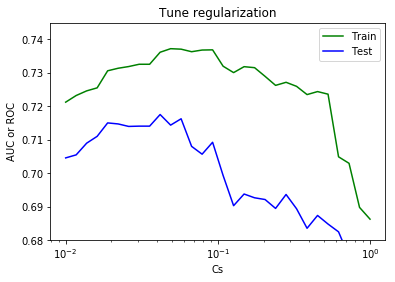

          C     Train      Test
9  0.041753  0.736128  0.717508
           C     Train      Test
0   0.010000  0.721204  0.704542
1   0.011721  0.723191  0.705449
2   0.013738  0.724580  0.708946
3   0.016103  0.725481  0.710986
4   0.018874  0.730581  0.715002
5   0.022122  0.731342  0.714695
6   0.025929  0.731847  0.713953
7   0.030392  0.732533  0.714035
8   0.035622  0.732533  0.714035
9   0.041753  0.736128  0.717508
10  0.048939  0.737191  0.714338
11  0.057362  0.737046  0.716237
12  0.067234  0.736285  0.707990
13  0.078805  0.736784  0.705651
14  0.092367  0.736843  0.709216
15  0.108264  0.731955  0.699300
16  0.126896  0.730038  0.690256
17  0.148735  0.731814  0.693745
18  0.174333  0.731514  0.692616
19  0.204336  0.728917  0.692101
20  0.239503  0.726224  0.689440
21  0.280722  0.727141  0.693607
22  0.329034  0.725933  0.689340
23  0.385662  0.723469  0.683504
24  0.452035  0.724368  0.687339
25  0.529832  0.723591  0.684764
26  0.621017  0.704868  0.682439
27  0.727895

In [309]:
# variable selection by using lasso regression
N = 16 #number of variables
Test_roc = [] #create a empty list for storing Test ROC
Train_roc = [] #create a empty list for storing Train ROC
Cs = np.logspace(-2, 0, num=30) #(select 20 numbers between 10^-2 and 10^4 )
# for each C pick the N most important variables and use these vairbles to rerun logistic regression. finally, calculate ROC for train and test.
for C in Cs:
    lr = LogisticRegression(penalty='l1',C = C,random_state = 1).fit(Converted_X_train.drop('FICCLAV8_SCORE',axis = 1), y_train,y_train_freq)
    feature_importances = pd.DataFrame(lr.coef_.T,
                                       index = Converted_X_train.drop('FICCLAV8_SCORE',axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    new_X_train=Converted_X_train[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new train dataset
    new_X_test=Converted_X_test[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new test dataset
    lr = LogisticRegression().fit(new_X_train, y_train,y_train_freq) #run logistic regression
    y_decision_fn_scores_auc = lr.decision_function(new_X_train) # calculate score (just like when we calculate Taprezoid ROC we need socre)
    Train_roc.append(roc_auc_score(y_train, y_decision_fn_scores_auc, sample_weight = y_train_freq)) #calculate ROC and print it out
    y_decision_fn_scores_auc = lr.decision_function(new_X_test)
    Test_roc.append(roc_auc_score(y_test, y_decision_fn_scores_auc, sample_weight = y_test_freq))

# plot train and test ROC (X: Cs the regulation varible, Y: ROC)
ax = plt.gca()
ax.set_xscale('log')
ax.plot(Cs, Train_roc,'g', label = 'Train')
ax.plot(Cs, Test_roc,'b', label = 'Test')
#Set limits and titles
plt.ylim([0.68,0.745]) # Y range
plt.xlabel('Cs')
plt.ylabel('AUC or ROC')
plt.legend()
plt.title('Tune regularization')
 
plt.savefig('Tuning.png')
plt.show()

df = pd.DataFrame([Cs,Train_roc,Test_roc]).T.rename(columns={0:"C",1:"Train", 2:"Test"}) # save result in dataframe
print(df[df["Test"] == df["Test"].max()]) #print out the C with highest Test ROC
print(df) #print out all C, Train ROC score and Test ROC score

In [310]:
# run logistic regression and print aout ROC and variables we use
lr = LogisticRegression(penalty='l1',C =  0.041753,random_state = 1).fit(Converted_X_train.drop('FICCLAV8_SCORE',axis = 1), y_train,y_train_freq) #run lasso logistic regression using best C
feature_importances = pd.DataFrame(lr.coef_.T,
                                       index = Converted_X_train.drop('FICCLAV8_SCORE',axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False) # create a datafrme to save feature importance
new_X_train=Converted_X_train[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new train dataset
new_X_test=Converted_X_test[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new test dataset
lr = LogisticRegression().fit(new_X_train, y_train,y_train_freq) #run the logistic
y_decision_fn_scores_auc = lr.decision_function(new_X_train) # calculate decision score (when we calculate Taprezoid ROC we need socre) 
print('Train set AUC: ',roc_auc_score(y_train, y_decision_fn_scores_auc, sample_weight = y_train_freq)) #calculate ROC and print it out
y_decision_fn_scores_auc = lr.decision_function(new_X_test)
print('Test set AUC: ',roc_auc_score(y_test, y_decision_fn_scores_auc, sample_weight = y_test_freq))
selected_feature = feature_importances.iloc[0:N,:].index.tolist() # select the best N variable's name and  and save them in list 
lr_coef = pd.DataFrame(lr.coef_.T, index = new_X_train.columns, columns=['coefficient']).sort_values('coefficient',ascending=False) # create a new dataframe to save variable name and coefficient
print(lr_coef) #print variable coefficient
lr.intercept_[0] #print out intercept

Train set AUC:  0.7361276326982752
Test set AUC:  0.7175082327113147
                        coefficient
ALL4520                    0.722721
AUT7110                    0.570756
addrprevioustimeoldest     0.529359
ALL2428                    0.513654
ILN8220                    0.507521
SL_DIFF_CELLPHONE_1M       0.462925
AUA2328                    0.387851
ALL7140                    0.382509
crossindustry_score        0.316763
COL8192                    0.302325
VANTAGE_V4_SCORE           0.293789
ILN8160                    0.249520
COL5069                    0.249139
ALL8325                    0.216786
auto_score                 0.194525
ALL7115                    0.068640


0.7694434851824911

In [311]:
# calculate score
scorecard_point ={}
for i in lr_coef.index.tolist():
    scorecard_point[i] = group_dictionary[i].copy()
    scorecard_point[i]['score_point'] =  round((scorecard_point[i]['WOE']*lr_coef.loc[i][0]+lr.intercept_[0]/N)*28.8539008+200/N)
scorecard_point['ALL2428']

,min_ALL2428,max_ALL2428,GOOD,total,GOOD_rate,WOE,score_point
0,0.0,0.0,3517.297291,4874.297291,0.721601,0.189665,17.0
1,1.0,1.0,750.642714,1250.642714,0.600206,-0.356538,9.0
2,2.0,10.0,285.244232,550.244232,0.516518,-0.696548,4.0
3,NaN,NaN,0.000000,2.000000,0.516518,-0.696548,4.0


In [312]:
# create scorecard table
for i,j in zip(lr_coef.index.tolist(),range(len(lr_coef))):
    if j == 0:
        scorecard = scorecard_point[i].copy()
        scorecard = scorecard.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard['variable'] = i
        scorecard = scorecard.set_index('variable')
        
    else:
        scorecard2 = scorecard_point[i].copy()
        scorecard2 = scorecard2.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard2['variable'] = i
        scorecard2 = scorecard2.set_index('variable')
        scorecard = pd.concat([scorecard,scorecard2], ignore_index=False)
scorecard

,min,max,GOOD,total,GOOD_rate,WOE,score_point
variable,,,,,,,
ALL4520,0.0,7.0,937.231046,1678.231046,0.557799,-0.530431,3.0
ALL4520,8.0,19.0,1310.407710,1999.407710,0.655398,-0.120017,11.0
ALL4520,20.0,29.0,742.063941,1037.063941,0.715543,0.158914,17.0
ALL4520,30.0,80.0,1282.526695,1633.526695,0.785127,0.532242,25.0
ALL4520,81.0,84.0,280.954845,326.954845,0.859308,1.037994,36.0
ALL4520,NaN,NaN,0.000000,2.000000,0.557799,-0.530431,3.0
AUT7110,1.0,102.0,1825.134143,2486.134143,0.734125,0.252647,18.0
AUT7110,103.0,145.0,450.385629,833.385629,0.540429,-0.600652,4.0
AUT7110,NaN,NaN,2277.664465,3357.664465,0.678348,-0.016580,14.0


In [75]:
# import rejected dataset
rejected_db = pd.read_excel(r"\\neptune\RAD\4 Models\Scorecard 7.0\Modeling Data\JM\Valid FICO CA Nohit\Rejects_38463.xlsx")
len(rejected_db)

38463

In [403]:
# sample rejected dataset down
rejected_sampledown = rejected_db[rejected_db['VANTAGE_V4_SCORE'].notnull()].sample(n=len(GB),random_state=9199)
print("Sample to :",len(rejected_sampledown))

Sample to : 6068


In [404]:
# prepare data for reject inference
#a.remove('Frequency')
#a.remove('G_B')
#for i in ['G_B', 'Frequency']:
#    a.remove(i)
rejected_droped = rejected_sampledown.drop(a,axis=1)

In [405]:
rejected_droped['useless_column'] = 1

In [406]:
# prepare data for reject inference
GB_accept = GB_for_group.copy()
GB_accept['GOOD'] = y['GOOD']
GB_accept['Frequency'] = GB['Frequency']
GB_accept.head()

,auto_score,bankcard_score,short_term_lending_score,telecommunications_score,crossindustry_score,inputprovidedssn,inputprovidedphone,subjectrecordtimeoldest,subjectrecordtimenewest,subjectnewestrecord12month,...,UTI0436,UTI2388,UTI4180,UTI5030,UTI6200,UTI6280,UTI8151,UTI8320,GOOD,Frequency
4117,707.0,738.0,621.0,637.0,619.0,3.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.144693
5672,670.0,751.0,608.0,624.0,647.0,3.0,0.0,24.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.144693
3330,676.0,753.0,574.0,599.0,666.0,3.0,0.0,57.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.144693
4884,665.0,766.0,595.0,633.0,637.0,3.0,0.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.144693
849,678.0,744.0,584.0,625.0,638.0,3.0,1.0,107.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.144693


In [407]:
# createreject_inference_function

def reject_inference(GB_accept, rejected_droped, model,selected_feature,group_dictionary,rejection_rate =0.7):
    # Convert data
    r_db, converted_r_db = convert_X(rejected_droped, selected_feature, group_dictionary)
    
    Assume_Good = rejected_droped.copy()
    Assume_Good['Good_prob'] = rejection_rate/(1 - rejection_rate)/(len(rejected_droped)/GB_accept['Frequency'].sum())
    Assume_Good['GOOD'] = 1 
    Assume_Good['Frequency'] = Assume_Good['Good_prob']*model.predict_proba(converted_r_db)[:,1]
    
    Assume_Bad = rejected_droped.copy()
    Assume_Bad['Good_prob'] = rejection_rate/(1 - rejection_rate)/(len(rejected_droped)/GB_accept['Frequency'].sum())
    Assume_Bad['GOOD'] = 0
    Assume_Bad['Frequency'] = Assume_Good['Good_prob']*model.predict_proba(converted_r_db)[:,0]
    
    Assume_GB = Assume_Good.append(Assume_Bad, ignore_index=True)
    
    Accept_Reject = GB_accept.reset_index().append(Assume_GB[GB_accept.columns.tolist()], ignore_index=True,sort=False)
    return Accept_Reject

In [409]:
# run reject inference function
Accept_Reject= reject_inference(GB_accept, rejected_droped, lr,selected_feature, group_dictionary, rejection_rate =0.7)
print('Accept_Reject:', len(Accept_Reject))

Accept_Reject: 18204


In [410]:
# prepare data for training
y_Good2=Accept_Reject["GOOD"]
Accept_Reject_index = Accept_Reject['index']
Accept_Reject_freq = Accept_Reject['Frequency']
Accept_Reject_noindex = Accept_Reject.drop(['index','GOOD'],axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Accept_Reject_noindex, y_Good2, random_state = 12345, test_size=0.3)
y_train_freq2 = X_train2['Frequency']
y_test_freq2 = X_test2['Frequency']
X_train2 = X_train2.drop(['Frequency'],axis = 1)
X_test2 = X_test2.drop(['Frequency'],axis = 1)

In [411]:
# run interactive grouping again
group_dictionary2, Accept_List2, IV_table2 = interactive_grouping2(X_train2, y_train2, Accept_Reject_freq, n=5, reject_level=0.02)

C:\Users\yam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


EL_EmployerDomainMatches includes Nan only
EL_EmployerMatchPercentage includes Nan only
EL_EmployerMatchRatio includes Nan only
EL_EmployerNames includes Nan only
EL_HomeZipToWorkZipDistances includes Nan only
EL_IPaddrOriginDomains includes Nan only
EL_IPOriginToWorkZipDistances includes Nan only
EL_MonthlyIncomes includes Nan only
EL_PaydtMatchCount includes Nan only
EL_PaydtMatchPercentage includes Nan only
EL_paydtmatchProjected includes Nan only
EL_PaydtMatchRatio includes Nan only
EL_PayFrequencies includes Nan only
EL_PayFrequencyMatchPercentage includes Nan only
EL_PayFrequencyMatchRatio includes Nan only
EL_PayrollTypes includes Nan only
EL_Projectedpaydt includes Nan only
EL_Score includes Nan only
EL_ScorePercentage includes Nan only
EL_WorkZips includes Nan only


In [412]:
group_dictionary2['crossindustry_score']

,min_crossindustry_score,max_crossindustry_score,GOOD,total,GOOD_rate,WOE
0,501.0,559.0,499.590986,1099.190123,0.454508,-0.854158
1,560.0,607.0,2478.953652,4366.272994,0.567750,-0.399238
2,608.0,670.0,6443.329998,9694.887973,0.664611,0.011982
3,671.0,707.0,3150.607115,4313.388530,0.730425,0.324656
4,708.0,833.0,1711.165224,2129.357598,0.803606,0.736232
5,NaN,NaN,443.351563,645.877794,0.686433,0.110301


In [413]:
# show information value table
IV_table2.head(10)

,Variable_Name,Information_Value,Reject_or_Accept
579,FICCLAV8_SCORE,0.493805,Accept
580,VANTAGE_V4_SCORE,0.479562,Accept
880,ALL7331,0.369296,Accept
891,ALL7350,0.368359,Accept
887,ALL7340,0.365611,Accept
893,ALL7360,0.354310,Accept
907,ALL7936,0.352996,Accept
909,ALL7938,0.349134,Accept
908,ALL7937,0.345958,Accept
894,ALL7370,0.317486,Accept


In [414]:
# convert test value to WOE
Original_X_train2, Converted_X_train2 = convert_X(X_train2, Accept_List2, group_dictionary2)
Original_X_test2, Converted_X_test2 = convert_X(X_test2, Accept_List2, group_dictionary2)

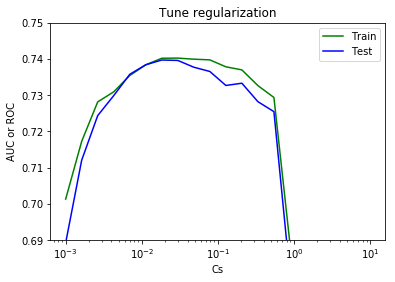

         C     Train      Test
6  0.01833  0.740152  0.739668
            C     Train      Test
0    0.001000  0.701295  0.689208
1    0.001624  0.717219  0.712019
2    0.002637  0.728106  0.724328
3    0.004281  0.730886  0.729841
4    0.006952  0.735384  0.735714
5    0.011288  0.738351  0.738344
6    0.018330  0.740152  0.739668
7    0.029764  0.740191  0.739547
8    0.048329  0.739893  0.737678
9    0.078476  0.739707  0.736502
10   0.127427  0.737790  0.732645
11   0.206914  0.736937  0.733260
12   0.335982  0.732601  0.728169
13   0.545559  0.729332  0.725423
14   0.885867  0.688983  0.680345
15   1.438450  0.670628  0.654560
16   2.335721  0.657966  0.647913
17   3.792690  0.655695  0.648793
18   6.158482  0.658537  0.650492
19  10.000000  0.658180  0.649053


In [440]:
# variable selection
N2 = 16 # number of variables
Test_roc = []
Train_roc = []
Cs = np.logspace(-3, 1, num=20)
for C in Cs:
    lr2 = LogisticRegression(penalty='l1',C = C).fit(Converted_X_train2.drop(['SL_DIFF_CELLPHONE_6M','FICCLAV8_SCORE','SL_DIFF_CELLPHONE_2M'],axis = 1), y_train2,y_train_freq2)
    feature_importances2 = pd.DataFrame(lr2.coef_.T,
                                       index = Converted_X_train2.drop(['SL_DIFF_CELLPHONE_6M','FICCLAV8_SCORE','SL_DIFF_CELLPHONE_2M'],axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    new_X_train2=Converted_X_train2[feature_importances2.iloc[0:N2,:].index.tolist()]
    new_X_test2=Converted_X_test2[feature_importances2.iloc[0:N2,:].index.tolist()]
    lr2 = LogisticRegression().fit(new_X_train2, y_train2,y_train_freq2)
    y_decision_fn_scores_auc2 = lr2.decision_function(new_X_train2)
    Train_roc.append(roc_auc_score(y_train2, y_decision_fn_scores_auc2, sample_weight = y_train_freq2))
    y_decision_fn_scores_auc2 = lr2.decision_function(new_X_test2)
    Test_roc.append(roc_auc_score(y_test2, y_decision_fn_scores_auc2, sample_weight = y_test_freq2))
    
ax = plt.gca()
ax.set_xscale('log')
ax.plot(Cs, Train_roc,'g', label = 'Train')
ax.plot(Cs, Test_roc,'b', label = 'Test')
#Set limits and titles
plt.ylim([0.69,0.75])
plt.xlabel('Cs')
plt.ylabel('AUC or ROC')
plt.legend()
plt.title('Tune regularization')
 
plt.savefig('Tuning.png')
plt.show()

df2 = pd.DataFrame([Cs,Train_roc,Test_roc]).T.rename(columns={0:"C",1:"Train", 2:"Test"})
print(df2[df2["Test"] == df2["Test"].max()])
print(df2)

In [443]:
# run logistic regression
lr2 = LogisticRegression(penalty='l1',C = 0.01833).fit(Converted_X_train2.drop(['SL_DIFF_CELLPHONE_6M','FICCLAV8_SCORE','SL_DIFF_CELLPHONE_2M','auto_score'],axis = 1), y_train2,y_train_freq2)
feature_importances2 = pd.DataFrame(lr2.coef_.T,
                                       index = Converted_X_train2.drop(['SL_DIFF_CELLPHONE_6M','FICCLAV8_SCORE','SL_DIFF_CELLPHONE_2M','auto_score'],axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
new_X_train2=Converted_X_train2[feature_importances2.iloc[0:N2,:].index.tolist()]
new_X_test2=Converted_X_test2[feature_importances2.iloc[0:N2,:].index.tolist()]
lr2 = LogisticRegression().fit(new_X_train2, y_train2,y_train_freq2)
y_decision_fn_scores_auc2 = lr2.decision_function(new_X_train2)
print('Train set AUC: ',roc_auc_score(y_train2, y_decision_fn_scores_auc2, sample_weight = y_train_freq2))
y_decision_fn_scores_auc2 = lr2.decision_function(new_X_test2)
print('Test set AUC: ',roc_auc_score(y_test2, y_decision_fn_scores_auc2, sample_weight = y_test_freq2))
lr_coef2 = pd.DataFrame(lr2.coef_.T, index = new_X_train2.columns, columns=['coefficient']).sort_values('coefficient',ascending=False)
print(lr_coef2)
lr2.intercept_[0]

Train set AUC:  0.7401534211551445
Test set AUC:  0.738835766642715
                          coefficient
ALL4520                      0.539380
AUT7110                      0.513546
ILN8220                      0.506523
ALL2428                      0.482211
addrprevioustimeoldest       0.442009
SL_DIFF_CELLPHONE_3M         0.427323
AUA2328                      0.320154
BRC7140                      0.315681
VANTAGE_V4_SCORE             0.308696
COL8192                      0.274987
crossindustry_score          0.264069
COL5069                      0.258433
ILN8160                      0.197437
telecommunications_score     0.180619
ALL8325                      0.142613
ALL4028                      0.095708


0.6791406463765035

In [444]:
# regroup function
def regroup( group_dictionary, group_number=[0, 1, 2, 3, 4, 5], variable_name = 'crossindustry_score'):
    pd_Series = pd.Series(group_number) #convert list to series
    t = group_dictionary[variable_name].set_index(pd_Series) # reset the index
    t1 = t.reset_index().groupby('index') # group by index
    t2 = pd.DataFrame(t1['GOOD'].sum()) # sum 'GOOD' by index
    t2['total'] = t1['total'].sum() # sum total by index
    t2['GOOD_rate'] = t2['GOOD']/t2['total'] # recalculate good rate
    Total_Event = group_dictionary[variable_name]['GOOD'].sum() # count total event
    Total_Nonevent = group_dictionary[variable_name]['total'].sum() - Total_Event # count total nonevent
    t2['WOE'] = t2.apply(lambda x: np.log(((x['GOOD']+0.5)/Total_Event)/((x['total']-x['GOOD']+0.5)/Total_Nonevent)),axis=1) #recalculate WOE
    group_dictionary[variable_name] = t.drop(['GOOD_rate','WOE'],axis = 1).join(t2[['GOOD_rate','WOE']], how = 'left').reset_index(drop = True).sort_values(t.columns[0],ascending=True) # cover original GOOD_rate and WOE

In [445]:
regroup(group_dictionary2, group_number=[0, 1, 2, 3, 4, 5], variable_name = 'crossindustry_score')
group_dictionary2['crossindustry_score']

,min_crossindustry_score,max_crossindustry_score,GOOD,total,GOOD_rate,WOE
0,501.0,559.0,499.590986,1099.190123,0.454508,-0.854158
1,560.0,607.0,2478.953652,4366.272994,0.567750,-0.399238
2,608.0,670.0,6443.329998,9694.887973,0.664611,0.011982
3,671.0,707.0,3150.607115,4313.388530,0.730425,0.324656
4,708.0,833.0,1711.165224,2129.357598,0.803606,0.736232
5,NaN,NaN,443.351563,645.877794,0.686433,0.110301


In [446]:
# calculate score
scorecard_point ={}
for i in lr_coef2.index.tolist():
    scorecard_point[i] = group_dictionary2[i].copy()
    scorecard_point[i]['score_point'] =  round((scorecard_point[i]['WOE']*lr_coef2.loc[i][0]+lr2.intercept_[0]/N2)*28.8539008+200/N2)
scorecard_point['crossindustry_score']

,min_crossindustry_score,max_crossindustry_score,GOOD,total,GOOD_rate,WOE,score_point
0,501.0,559.0,499.590986,1099.190123,0.454508,-0.854158,7.0
1,560.0,607.0,2478.953652,4366.272994,0.567750,-0.399238,11.0
2,608.0,670.0,6443.329998,9694.887973,0.664611,0.011982,14.0
3,671.0,707.0,3150.607115,4313.388530,0.730425,0.324656,16.0
4,708.0,833.0,1711.165224,2129.357598,0.803606,0.736232,19.0
5,NaN,NaN,443.351563,645.877794,0.686433,0.110301,15.0


In [447]:
# score function
# the same as Convert_X function
def score(db_original, Feature_List, scorecard_point):
    db = db_original[Feature_List]
    db1 = db.fillna(db.min()-100000).reset_index()
    columns = db.columns
    converted_db = db.copy()
    scorecard_point1 = copy.deepcopy(scorecard_point)
    for i in range(len(columns)):
                db1[columns[i]] = db1[columns[i]].astype('float64')
                scorecard_point1[columns[i]].loc[0,['min_' + columns[i]]] = scorecard_point[columns[i]]['min_' + columns[i]].min()-99999
                db2 = pd.merge_asof(db1.sort_values(columns[i]), \
                                    scorecard_point1[columns[i]].fillna(scorecard_point1[columns[i]].min()-100000).sort_values('min_' + columns[i]), \
                                    left_on = columns[i], right_on = 'min_' + columns[i])[['index','score_point']].set_index('index')
                converted_db[columns[i]] = db2['score_point']
                converted_db['sum'] = converted_db[Feature_List].sum(axis = 1)
    return converted_db

In [448]:
# run the score function to calculate score
scored_db = score(db,lr_coef2.index.tolist(),scorecard_point)

In [449]:
scored_db

,ALL4520,AUT7110,ILN8220,ALL2428,addrprevioustimeoldest,SL_DIFF_CELLPHONE_3M,AUA2328,BRC7140,VANTAGE_V4_SCORE,COL8192,crossindustry_score,COL5069,ILN8160,telecommunications_score,ALL8325,ALL4028,sum
0,17.0,19.0,11.0,17.0,11.0,17.0,16.0,10.0,21.0,10.0,7.0,9.0,15.0,13.0,12.0,14.0,219.0
1,23.0,12.0,11.0,8.0,15.0,17.0,15.0,10.0,6.0,10.0,11.0,12.0,15.0,11.0,12.0,12.0,200.0
2,12.0,6.0,11.0,17.0,11.0,17.0,16.0,10.0,10.0,10.0,11.0,11.0,13.0,13.0,12.0,14.0,194.0
3,23.0,12.0,17.0,17.0,17.0,17.0,15.0,18.0,16.0,17.0,14.0,16.0,15.0,13.0,18.0,14.0,259.0
4,12.0,12.0,11.0,17.0,8.0,11.0,15.0,22.0,21.0,17.0,14.0,16.0,15.0,15.0,18.0,14.0,238.0
5,4.0,19.0,11.0,17.0,17.0,11.0,16.0,10.0,16.0,13.0,16.0,16.0,15.0,15.0,12.0,13.0,221.0
6,17.0,19.0,11.0,17.0,8.0,17.0,16.0,18.0,26.0,17.0,19.0,16.0,15.0,15.0,18.0,14.0,263.0
7,17.0,12.0,19.0,17.0,11.0,17.0,15.0,10.0,10.0,10.0,14.0,11.0,13.0,13.0,13.0,12.0,214.0
8,12.0,12.0,11.0,17.0,11.0,17.0,15.0,10.0,6.0,10.0,14.0,9.0,15.0,13.0,13.0,16.0,201.0
9,12.0,12.0,17.0,17.0,17.0,11.0,15.0,10.0,26.0,17.0,14.0,16.0,15.0,15.0,18.0,14.0,246.0


In [450]:
# add a new column 'score' to original dataset
db['score'] = scored_db['sum']

In [451]:
# create scorecard table
for i,j in zip(lr_coef2.index.tolist(),range(len(lr_coef2))):
    if j == 0:
        scorecard = scorecard_point[i].copy()
        scorecard = scorecard.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard['variable'] = i
        scorecard = scorecard.set_index('variable')
        
    else:
        scorecard2 = scorecard_point[i].copy()
        scorecard2 = scorecard2.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard2['variable'] = i
        scorecard2 = scorecard2.set_index('variable')
        scorecard = pd.concat([scorecard,scorecard2], ignore_index=False)
scorecard

,min,max,GOOD,total,GOOD_rate,WOE,score_point
variable,,,,,,,
ALL4520,0.0,6.0,2547.836370,4953.941555,0.514305,-0.614630,4.0
ALL4520,7.0,20.0,4765.776420,7492.218567,0.636097,-0.113469,12.0
ALL4520,21.0,34.0,3044.608141,4326.206204,0.703759,0.193185,17.0
ALL4520,35.0,76.0,3406.047409,4353.119289,0.782438,0.607698,23.0
ALL4520,77.0,84.0,959.914417,1111.425902,0.863678,1.171555,32.0
ALL4520,NaN,NaN,2.815782,12.063497,0.233413,-1.750193,-14.0
AUT7110,0.0,98.0,3007.865051,4084.964641,0.736326,0.354807,19.0
AUT7110,99.0,102.0,1918.126699,2718.364400,0.705618,0.201978,17.0
AUT7110,103.0,145.0,549.649235,1032.738194,0.532225,-0.542899,6.0


In [452]:
#Stage 2
#Filter out Good and Bad

Stage2_Goods=db[db["G_B"]=="GOOD"]  #we use two db because one db will give the count of the whole dataset
Stage2_Bads=db[db["G_B"]=="BAD"]
Stage2_GB=Stage2_Goods.append(Stage2_Bads) #can do Good.append(Bad)
print("append Good and Bad:",len(Stage2_GB)) #GB #will give the dataset that has the good and bad appended

append Good and Bad: 8597


In [453]:
# Convert Good and Bad to dummy variable
Stage2_GB_y = pd.get_dummies(Stage2_GB["G_B"]) #converts categorical variable (target) into dummy/indicator variables such as zero and one. The G_B becomes two columns (Good and Bad)
Stage2_GB_y_Bad = Stage2_GB_y["BAD"]

In [454]:
# Train and Test split
Stage2_X_train, Stage2_X_test, Stage2_y_train, Stage2_y_test = train_test_split(Stage2_GB[['score','SQL_CASHDOWNPCT', 'SQL_PTI', 'SQL_OPENINGBALANCE_PCT']], Stage2_GB_y_Bad, random_state = 34, test_size=0.25) #2609

In [455]:
# Run logistic Regression
lr3 = LogisticRegression().fit(Stage2_X_train, Stage2_y_train)

In [456]:
y_decision_fn_scores_auc3 = lr3.decision_function(Stage2_X_train)
print('Train set AUC: ',roc_auc_score(Stage2_y_train, y_decision_fn_scores_auc3))
y_decision_fn_scores_auc3 = lr3.decision_function(Stage2_X_test)
print('Test set AUC: ',roc_auc_score(Stage2_y_test, y_decision_fn_scores_auc3))
lr_coef3 = pd.DataFrame(lr3.coef_.T, index = Stage2_X_train.columns, columns=['coefficient']).sort_values('coefficient',ascending=False)
print(lr_coef3)
lr3.intercept_[0]

Train set AUC:  0.7349896747547755
Test set AUC:  0.731522709986749
                        coefficient
SQL_PTI                    0.026303
SQL_OPENINGBALANCE_PCT     0.008047
SQL_CASHDOWNPCT           -0.016062
score                     -0.031947


5.135944611311324

In [457]:
# calculate Bad Proba
db['Bad_Proba'] = lr3.predict_proba(db[['score','SQL_CASHDOWNPCT', 'SQL_PTI', 'SQL_OPENINGBALANCE_PCT']])[:,1]

In [458]:
abc = IV_table2.set_index('Variable_Name').loc[new_X_train2.columns.tolist(),:].sort_values('Information_Value', ascending=False)
abc

,Information_Value,Reject_or_Accept
Variable_Name,,
VANTAGE_V4_SCORE,0.479562,Accept
BRC7140,0.282870,Accept
ALL8325,0.253026,Accept
ALL4520,0.220320,Accept
ALL4028,0.211218,Accept
COL8192,0.186861,Accept
COL5069,0.170737,Accept
ILN8160,0.166567,Accept
crossindustry_score,0.136375,Accept


In [459]:
# export result to excel
writer = pd.ExcelWriter(r'\\neptune\RAD\4 Models\Scorecard 7.0\Temp Workspace\JM\offical modeling\Valid FICO CA Nohit\Valid FICO CA Nohit2.xlsx')
db.to_excel(writer,'Sheet1')
scorecard.to_excel(writer,'Variables')
abc.to_excel(writer,'Information_Values')
writer.save()